In [6]:
import osmnx as ox
import json
import pickle as pkl
import math
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import random

In [4]:
with open("../places.json") as fin:
    places = json.load(fin)

print(places[8])
with open(f"../data/networks/{places[0][2]}.pkl", "rb") as fin:
    G = pkl.load(fin)
    G = ox.project_graph(G)

['Yale University', [41.31632, -72.92234], 'yale']


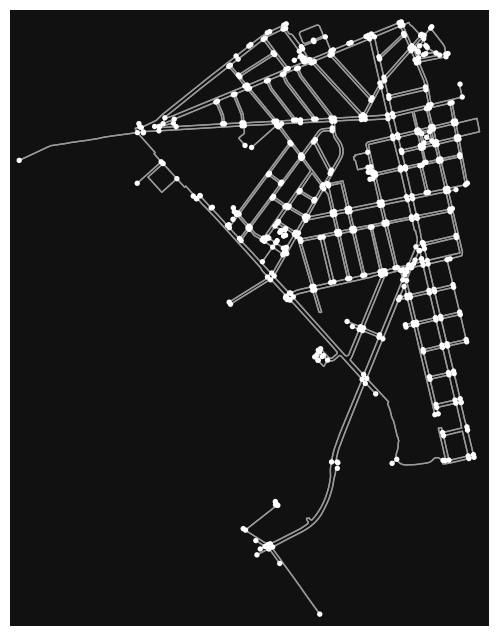

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [62]:
ox.plot_graph(G)

In [5]:
for u, v in G.edges():
    if not G.has_edge(v, u):
        print(f"Violation: {v}, {u}")

Violation: 2446048063, 2446048074
Violation: 2446048093, 2446048064
Violation: 2446048074, 2446048093


In [8]:
random.choices(list(G.nodes()), k=100)

[1098574546,
 7626171380,
 7891957444,
 5549076771,
 7848534500,
 7896598063,
 1017007803,
 7628514696,
 9749971492,
 7875876031,
 7579360340,
 538133634,
 9775274848,
 6154448928,
 7896094941,
 7846093474,
 7894260093,
 7637209703,
 9246781628,
 688404516,
 9661173405,
 3256092128,
 7847936494,
 7735849136,
 8630340892,
 7842263028,
 7889611892,
 7644472502,
 2942099285,
 7629493752,
 10844740680,
 7802311719,
 2292064923,
 10566187415,
 7896236642,
 1097255645,
 7607086401,
 7875875587,
 70211301,
 1922933934,
 4636592594,
 9908416762,
 6822980701,
 7864095062,
 8603561957,
 10915299582,
 7868810183,
 7617222331,
 7575347910,
 9879661442,
 7624114275,
 7983186508,
 9051917511,
 11035061845,
 7882718876,
 7872176757,
 7628787404,
 7748212258,
 7678927776,
 8839713916,
 7618650756,
 7865829454,
 9879661447,
 10197834467,
 11070053334,
 7748212115,
 7636734824,
 1097411687,
 7896245506,
 8902300666,
 7009884017,
 5750423104,
 7838492300,
 7631024561,
 9879661511,
 7890555857,
 761729710

In [60]:
nodes, edges = ox.graph_to_gdfs(G)
print(f"Graph has {len(nodes)} nodes, {len(edges)} edges")

Graph has 548 nodes, 1702 edges


In [61]:
edges = edges.rename_axis(["u", "v", "key"]).reset_index()
edges = edges[["u", "v", "length", "geometry"]]

In [57]:
for idx, row in list(edges.iterrows()):
    print(row)

u                                                    61172479
v                                                  7932011607
length                                                  3.172
geometry    LINESTRING (325545.6385690479 4696806.29764003...
Name: 0, dtype: object
u                                                  7932011607
v                                                    61172479
length                                                  3.172
geometry    LINESTRING (325544.0791422947 4696803.53652166...
Name: 1, dtype: object
u                                                  7932011607
v                                                  7932011606
length                                                 17.561
geometry    LINESTRING (325544.0791422947 4696803.53652166...
Name: 2, dtype: object
u                                                  7932011607
v                                                  1155698660
length                                                142.389
g

KeyboardInterrupt: 

In [33]:
edges.iloc[0]

osmid                                                99973036
highway                                               footway
oneway                                                  False
reversed                                                 True
length                                                  3.172
geometry    LINESTRING (325545.6385690479 4696806.29764003...
lanes                                                     NaN
name                                                      NaN
width                                                     NaN
bridge                                                    NaN
access                                                    NaN
tunnel                                                    NaN
maxspeed                                                  NaN
service                                                   NaN
area                                                      NaN
landuse                                                   NaN
Name: (6

In [9]:
edges.sort_index();

In [5]:
u, v = 61172479, 7932011607
print(edges.loc[u].loc[v].geometry)
print(edges.loc[v].loc[u].geometry)
print()

print(nodes.loc[u])
print(nodes.loc[v])

key
0    LINESTRING (325545.639 4696806.298, 325544.079...
Name: geometry, dtype: geometry
key
0    LINESTRING (325544.079 4696803.537, 325545.639...
Name: geometry, dtype: geometry

y                                             4696806.29764
x                                             325545.638569
street_count                                              1
lon                                              -71.119905
lat                                               42.403963
highway                                                 NaN
ref                                                     NaN
geometry        POINT (325545.6385690479 4696806.297640038)
Name: 61172479, dtype: object
y                                            4696803.536522
x                                             325544.079142
street_count                                              4
lon                                              -71.119923
lat                                               42.403938
highway

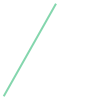

In [31]:
edges.loc[u,v].geometry[0]

In [6]:
def angle(linestring):
    """Get angle between two end points, in radians"""
    a, b = linestring.coords[:2]
    if np.isclose(a[0], b[0]): return np.pi / 2
    return math.atan2(b[1] - a[1], b[0] - a[0])

In [7]:
angle(edges.iloc[20].geometry)

-1.320561384655719

(325901.5010064437, 4693812.436289099)


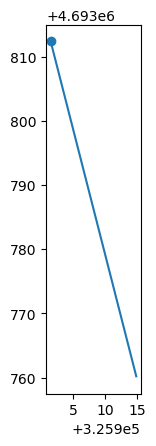

In [8]:
edges.iloc[20:21].plot()
print(edges.iloc[20].geometry.coords[0])
plt.plot(*edges.iloc[20].geometry.coords[0], "o")

In [10]:
G.get_edge_data(u, v)

{0: {'osmid': 99973036,
  'highway': 'footway',
  'oneway': False,
  'reversed': True,
  'length': 3.172}}